# Calculating Stock Returns using Pandas DataFrames

## 1. Import Libaries and Dependencies

In [1]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

## 2. Create a Path to the File Using Pathlib

In [2]:
# Use the Pathlib libary to set the path to the CSV
csvpath = Path("../Resources/MSFT.csv")

## 3. Read CSV in as DataFrame

In [3]:
# Read in the CSV as a DataFrame
MSFT_df = pd.read_csv(csvpath)
MSFT_df.head()

,date,close,volume,open,high,low
0,8/3/09,23.83,46843710,23.82,23.86,23.50
1,8/4/09,23.77,49116380,23.68,23.79,23.53
2,8/5/09,23.81,53263040,23.84,24.25,23.79
3,8/6/09,23.46,59655950,23.93,23.98,23.27
4,8/7/09,23.56,46165010,23.75,23.82,23.50


## 4. Drop Extra Columns

In [10]:
# Drop unnecessary columns
MSFT_df.drop(columns=["volume", "open", "high", "low"], inplace=True)
MSFT_df.head()

,date,close
0,8/3/09,23.83
1,8/4/09,23.77
2,8/5/09,23.81
3,8/6/09,23.46
4,8/7/09,23.56


## 5. Set Date as Index

In [14]:
# Set the date as the index to the DataFrame
MSFT_df.set_index(pd.to_datetime(MSFT_df["date"], infer_datetime_format=True), inplace=True)
MSFT_df.head()

,date,close
date,,
2009-08-03,8/3/09,23.83
2009-08-04,8/4/09,23.77
2009-08-05,8/5/09,23.81
2009-08-06,8/6/09,23.46
2009-08-07,8/7/09,23.56


## 6. Drop Extra Date Column

In [15]:
# Drop the extra date column
MSFT_df.drop(columns=["date"], inplace=True)
MSFT_df.head()

,close
date,
2009-08-03,23.83
2009-08-04,23.77
2009-08-05,23.81
2009-08-06,23.46
2009-08-07,23.56


## 7. Plot Daily Close

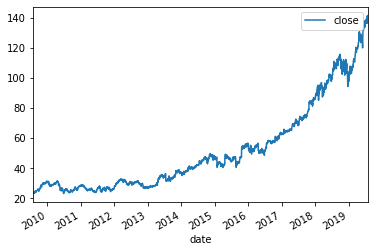

In [16]:
# Plot the daily closing stock price of the S&P 500 over the last 5 years
MSFT_df.plot()

## 8. Calculate Daily Returns

In [18]:
# Calculate the daily return using the 'pct_change()' function
daily_returns = MSFT_df.pct_change()
daily_returns.head()

,close
date,
2009-08-03,NaN
2009-08-04,-0.002518
2009-08-05,0.001683
2009-08-06,-0.014700
2009-08-07,0.004263


## 9. Plot Daily Returns

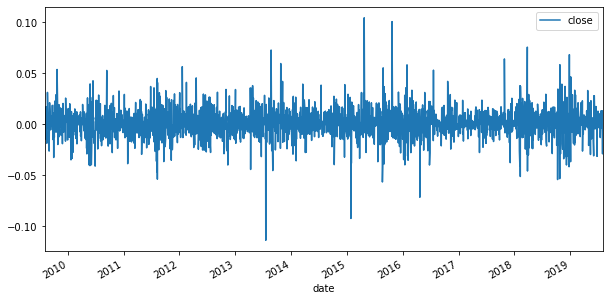

In [21]:
# Plot the daily returns of MSFT over the last 10 years
daily_returns.plot(figsize=(10,5)) 

## 10. Calculate Cumulative Returns

In [28]:
# Calculate the cumulative returns using the 'cumprod()' function
cum_returns = (1 + daily_returns).cumprod() - 1
cum_returns

,close
date,
2009-08-03,NaN
2009-08-04,-0.002518
2009-08-05,-0.000839
2009-08-06,-0.015527
2009-08-07,-0.011330
...,...
2019-07-26,4.931179
2019-07-29,4.918170
2019-07-30,4.889635


## 11. Plot Cumulative Returns

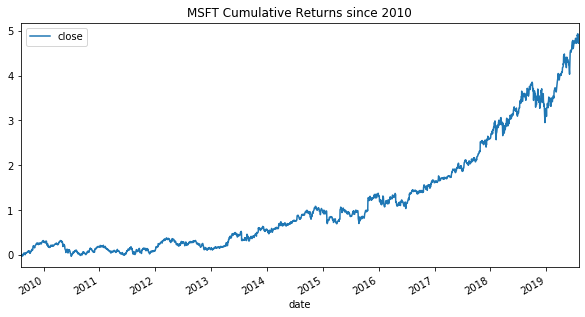

In [29]:
# Plot the daily returns of the S&P 500 over the last 5 years
cum_returns.plot(figsize=(10,5), title="MSFT Cumulative Returns since 2010")